In [44]:
# Imports for panel visualizations

import panel as pn
import plotly.express as px
pn.extension('plotly')
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np
import seaborn as sns
%matplotlib inline
import geoviews as gv
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'geoviews'

In [5]:
file_path = Path(r'C:\Users\tonyh\Desktop\hotel_bookings1.csv')
hotel_data = pd.read_csv(file_path)
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment,distribution_channel,reserved_room_type,assigned_room_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Direct,Direct,C,C,0,Transient,0.0,0,0,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Direct,Direct,C,C,0,Transient,0.0,0,0,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Direct,Direct,A,C,0,Transient,75.0,0,0,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Corporate,Corporate,A,A,0,Transient,75.0,0,0,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Online TA,TA/TO,A,A,0,Transient,98.0,0,1,7/3/2015


In [8]:
# Group by hotel and year?
grouped = hotel_data.groupby(["hotel", "arrival_date_year"])

In [9]:
avg_grouped = grouped.first()
avg_grouped.head()

is_canceled  lead_time arrival_date_month  \
hotel        arrival_date_year                                              
City Hotel   2015                         0          6               July   
             2016                         1        119            January   
             2017                         1         26            January   
Resort Hotel 2015                         0        342               July   
             2016                         0        109            January   

                                arrival_date_week_number  \
hotel        arrival_date_year                             
City Hotel   2015                                     27   
             2016                                      1   
             2017                                      1   
Resort Hotel 2015                                     27   
             2016                                      1   

                                arrival_date_day_of_month  \
hotel        arrival_date_year                              
City Hotel   2015                                       1   
             2016                                       1   
             2017                                       1   
Resort Hotel 2015                                       1   
             2016                                       1   

                                stays_in_weekend_nights  stays_in_week_nights  \
hotel        arrival_date_year                                                  
City Hotel   2015                                     0                     2   
             2016                                     0                     1   
             2017                                     1                     0   
Resort Hotel 2015                                     0                     0   
             2016                                     0                     1   

                                adults  children  babies  ... market_segment  \
hotel        arrival_date_year                            ...                  
City Hotel   2015                    1       0.0       0  ...  Offline TA/TO   
             2016                    2       0.0       0  ...         Direct   
             2017                    1       0.0       0  ...      Online TA   
Resort Hotel 2015                    2       0.0       0  ...         Direct   
             2016                    2       0.0       0  ...      Online TA   

                               distribution_channel reserved_room_type  \
hotel        arrival_date_year                                           
City Hotel   2015                             TA/TO                  A   
             2016                            Direct                  A   
             2017                             TA/TO                  A   
Resort Hotel 2015                            Direct                  C   
             2016                             TA/TO                  A   

                               assigned_room_type days_in_waiting_list  \
hotel        arrival_date_year                                           
City Hotel   2015                               A                    0   
             2016                               A                    0   
             2017                               A                    0   
Resort Hotel 2015                               C                    0   
             2016                               D                    0   

                                  customer_type     adr  \
hotel        arrival_date_year                            
City Hotel   2015                     Transient    0.00   
             2016                     Transient   74.25   
             2017                     Transient  128.00   
Resort Hotel 2015                     Transient    0.00   
             2016               Transient-Party   59.94   

                               required_car_parking_spaces  \


In [10]:
avg_grouped.hvplot.bar(x="arrival_date_year", y="lead_time", groupby="hotel")

:DynamicMap   [hotel]
   :Bars   [arrival_date_year]   (lead_time)

In [13]:
# Map country of origin?

In [14]:
hotel_data["country"].value_counts().sort_values(ascending=False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BWA        1
MMR        1
MDG        1
MRT        1
VGB        1
Name: country, Length: 177, dtype: int64

In [15]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX")

In [16]:
px.set_mapbox_access_token(mapbox_token)

In [18]:
file_path = Path(r"C:\Users\tonyh\Desktop\worldcities.csv")
world_data = pd.read_csv(file_path)
world_data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [19]:
world_data = world_data.drop(columns=["city_ascii", "iso2", "iso3", "iso3", "admin_name", "capital", "id", "population"])

In [25]:
world_data.head()

,city,lat,lng,country
0,Tokyo,35.6897,139.6922,Japan
1,Jakarta,-6.2146,106.8451,Indonesia
2,Delhi,28.6600,77.2300,India
3,Mumbai,18.9667,72.8333,India
4,Manila,14.5958,120.9772,Philippines


In [26]:
# Replace with hotel data and have functions that return figures, plots, etc.

# avg_data = pn.Row(average_gross_rent(), average_sales_price())
# yearly_data = pn.Column("replace with relevant hotel information")
# column_of_ML_model_1 = pn.Column(replace with ML model 1 information)
# neighborhood_data = pn.Column(column_of_neighborhood) 
# world_map_data = pn.Column(world_map()) 


# panel = pn.Tabs(
#    ("Yearly Market", yearly_data),   
#    ("Country of Origin Map", world_map_data),
#    ("ML model 1 Analysis", ML_model_1_data),
# )

In [27]:
# Serve the Panel dashboard

# panel.servable()

In [31]:
#Hotel Cancellations
total_cancelations = hotel_data["is_canceled"].sum()
rh_cancelations = hotel_data.hotel_dataloc[hotel_data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = hotel_data.loc[hotel_data["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / hotel_data.shape[0] * 100
rh_rel_cancel = rh_cancelations / hotel_data.loc[hotel_data["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / hotel_data.loc[hotel_data["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,224 (37 %)
Resort hotel bookings canceled: 11,122 (28 %)
City hotel bookings canceled: 33,102 (42 %)


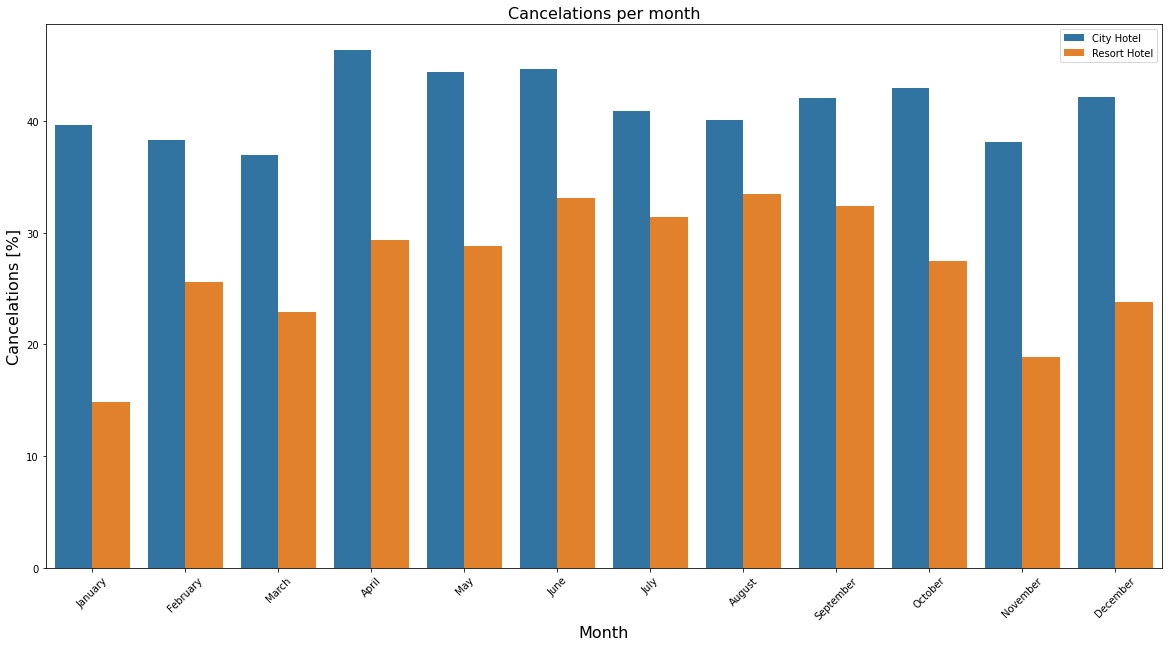

In [38]:
res_book_per_month = hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = hotel_data.loc[(hotel_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = hotel_data.loc[(hotel_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(20, 10))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

In [39]:
cancel_corr = hotel_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                      0.293123
total_of_special_requests      0.234658
required_car_parking_spaces    0.195498
adults                         0.060017
days_in_waiting_list           0.054186
adr                            0.047557
babies                         0.032491
stays_in_week_nights           0.024765
arrival_date_year              0.016660
arrival_date_week_number       0.008148
arrival_date_day_of_month      0.006130
children                       0.005048
stays_in_weekend_nights        0.001791
Name: is_canceled, dtype: float64

In [42]:
hotel_data.groupby("is_canceled")["reservation_status_date"].value_counts()

is_canceled  reservation_status_date
0            12/8/2015                  243
             6/26/2016                  228
             5/29/2016                  225
             2/14/2016                  207
             11/22/2015                 202
                                       ... 
1            4/7/2015                     1
             5/15/2015                    1
             6/14/2015                    1
             8/23/2015                    1
             9/13/2015                    1
Name: reservation_status_date, Length: 1707, dtype: int64